In [14]:
# Import required libraries
import ast
import json
import requests
import requests_cache
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tmdbv3api import TMDb, Movie
import tmdbsimple as tmdb_simple

In [34]:
# Reading IMDB movies data
# low_memory=False is used to remove the warnings
movies_df = pd.read_csv("data/imdb/IMDb movies.csv", low_memory=False)

In [35]:
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [37]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [38]:
# year column is of object type, we have to convert it to numeric
movies_df[['year']] = movies_df[['year']].apply(pd.to_numeric, errors='coerce') # Using errors='coerce' to convert String to NaN without giving error

In [39]:
# Display some Indian movie
movies_df[(movies_df["country"] == "India") & (movies_df["year"] > 2000) & (movies_df["year"] < 2010)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
30345,tt0118578,Albela,Albela,2001.0,2001-04-20,"Comedy, Drama, Romance",145,India,Hindi,Deepak Sareen,...,"Govinda, Aishwarya Rai Bachchan, Jackie Shroff...","Tony (Govinda) works as a guide, helping touri...",3.7,695,NaN,NaN,NaN,NaN,7.0,1.0
34269,tt0169102,Lagaan - C'era una volta in India,Lagaan: Once Upon a Time in India,2001.0,2002-08-23,"Adventure, Drama, Musical",224,India,Hindi,Ashutosh Gowariker,...,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",The people of a small village in Victorian Ind...,8.1,102618,$ 6000000,$ 909043,$ 1724806,84.0,286.0,77.0
35322,tt0187279,Meri Biwi Ka Jawab Nahin,Meri Biwi Ka Jawab Nahin,2004.0,2004-07-02,"Action, Comedy, Romance",150,India,Hindi,"Pankaj Parashar, S.M. Iqbal",...,"Akshay Kumar, Sridevi, Gulshan Grover, Laxmika...",Ajay gets married to his childhood friend Durg...,3.9,654,NaN,NaN,NaN,NaN,3.0,1.0
36286,tt0205380,Sanam Teri Kasam,Sanam Teri Kasam,2009.0,2009-05-22,"Action, Drama, Romance",170,India,"Hindi, English",Lawrence D'Souza,...,"Saif Ali Khan, Atul Agnihotri, Pooja Bhatt, Sh...",A love triangle forms after a male finds his b...,5.0,136,NaN,NaN,NaN,NaN,2.0,1.0
37086,tt0222024,Hum Tumhare Hain Sanam,Hum Tumhare Hain Sanam,2002.0,2002-05-24,"Drama, Romance",174,India,Hindi,K.S. Adiyaman,...,"Shah Rukh Khan, Madhuri Dixit, Salman Khan, At...",Gopal's blissful married life with Radha blemi...,5.4,6317,NaN,NaN,$ 899867,NaN,18.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76308,tt4960754,Kadhal Sadugudu,Kadhal Sadugudu,2003.0,2003-04-13,"Action, Drama",138,India,"Hindi, Tamil, Telugu",V.Z. Dhorai,...,"Vikram, Priyanka Upendra, Prakash Raj, Alphons...",A man who does everything unintentionally is m...,5.7,146,NaN,NaN,NaN,NaN,1.0,9.0
77876,tt5508936,Vamshi,Vamshi,2008.0,2008-10-02,"Action, Drama",139,India,Kannada,Prakash,...,"Puneeth Rajkumar, Nikita Thukral, Lakshmi, Avi...","Vamshi, under the eye of his mother is living ...",7.2,193,INR 20000000,NaN,NaN,NaN,NaN,NaN
80393,tt6358182,Unnai Ninaithu,Unnai Ninaithu,2002.0,2002-05-10,Drama,163,India,Tamil,Vikraman,...,"Suriya, Laila, Sneha, Ramesh Khanna, Thalaivas...",A young man tries to explain to his lover that...,6.9,297,INR 2000000,NaN,NaN,NaN,NaN,NaN
81296,tt6832682,Shahjahan,Shahjahan,2001.0,2001-11-14,"Drama, Romance",156,India,Tamil,K.S. Ravi,...,"Joseph Vijay, Balaji, Banu Balasubramaniam, Ch...",Ashok is the guy people turn to for love advic...,6.7,377,NaN,NaN,NaN,NaN,2.0,NaN


In [40]:
# Display year wise movie counts
movies_df.year.value_counts().sort_index()

1894.0       1
1906.0       1
1911.0       5
1912.0       5
1913.0      13
          ... 
2016.0    3138
2017.0    3329
2018.0    3257
2019.0    2841
2020.0     789
Name: year, Length: 112, dtype: int64

<AxesSubplot:>

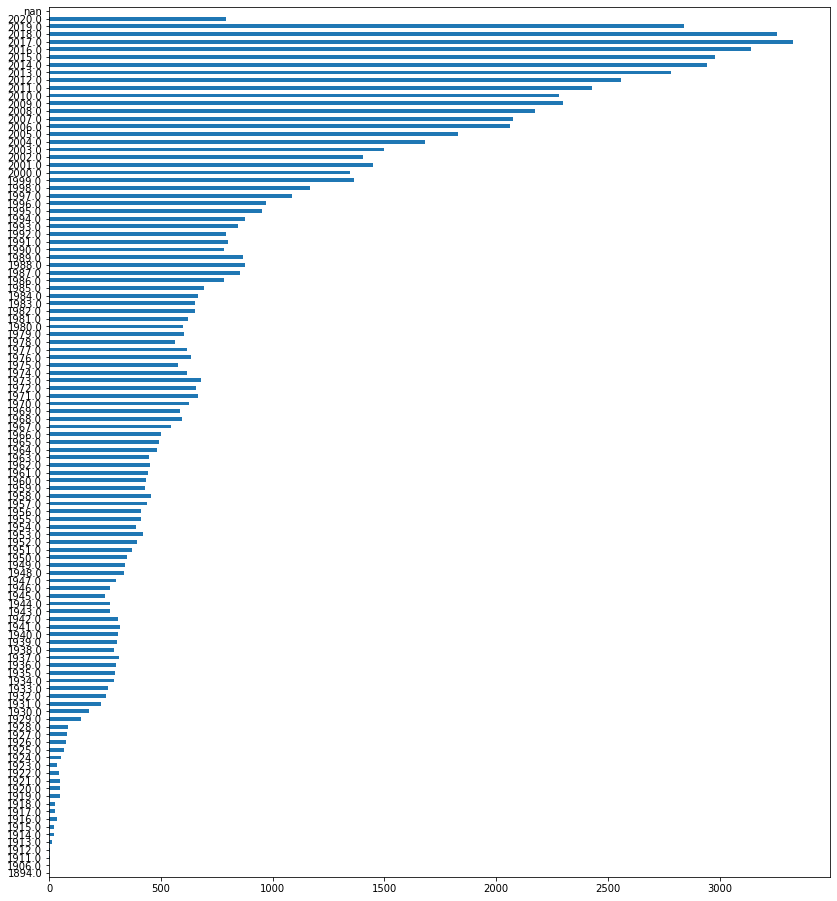

In [41]:
# Histogram of year wise movies
movies_df.year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(14,16))

In [42]:
print("Existing count of movies: ", movies_df.shape[0])
# movies_df["year"].isnull().any() # print True
# movies_df = movies_df[df['EPS'].notna()]

Existing count of movies:  85855


In [43]:
# Read movie ratings data 
ratings_df = pd.read_csv("data/imdb/IMDb ratings.csv")
print(ratings_df.columns)
ratings_df.head()

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [44]:
print("Ratings DataFrame count: ", ratings_df.shape[0])

Ratings DataFrame count:  85855


## Using Weighted Average:

**Here we will calculate rating for movie using a techinique called weighted average**

IMDB follows weighted average rating method instead of just average rating:

* https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK?ref_=helpsect_cons_2_8#
* http://trailerpark.weebly.com/imdb-rating.html?source=post_page


![Weighted Average Rating Formula](images/wt_avg_rat.png)

We can calculate our manual weighted average using this below logic:

In [55]:
v = ratings_df["total_votes"]
r = ratings_df["mean_vote"]
C = ratings_df["mean_vote"].mean()
m = ratings_df["total_votes"].quantile(0.70)
ratings_df["wa"] = ((r*v)+(C*m))/(v+m)
movies_sorted = ratings_df[["imdb_title_id", "weighted_average_vote", "wa"]].sort_values('wa', ascending=False)
# movies_sorted[["title", "year"]]
movies_sorted

,imdb_title_id,weighted_average_vote,wa
78754,tt5813916,8.8,9.361515
83783,tt8110330,8.8,9.261908
77545,tt5354160,9.1,9.208548
38406,tt0252487,9.3,9.195539
28453,tt0111161,9.3,9.098392
...,...,...,...
41838,tt0317676,2.0,2.435806
79423,tt6038600,1.4,2.348581
82091,tt7221896,1.0,2.138747
67895,tt2574698,2.4,2.091825


In [57]:
# Join movie and rating dataframe based on `imdb_title_id` column
movies_df = movies_df.merge(ratings_df, on="imdb_title_id", how="inner")
print("Movies DF count after join with rating DF: ", movies_df.shape[0])
movies_df.head()

Movies DF count after join with rating DF:  85855


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,wa
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,1894-10-09,Romance,45,USA,None,Alexander Black,...,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0,6.191198
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0,6.249605
2,tt0001892,Den sorte drøm,Den sorte drøm,1911.0,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0,6.197276
3,tt0002101,Cleopatra,Cleopatra,1912.0,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0,5.986418
4,tt0002130,L'Inferno,L'Inferno,1911.0,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0,6.655312


In [60]:
df1 = movies_df[["original_title", "weighted_average_vote", "wa", "country", "year"]].sort_values('wa', ascending=False)
df1

,original_title,weighted_average_vote,wa,country,year
78754,Dag II,8.8,9.361515,Turkey,2016.0
83783,Dil Bechara,8.8,9.261908,India,2020.0
77545,Aynabaji,9.1,9.208548,Bangladesh,2016.0
38406,Hababam Sinifi,9.3,9.195539,Turkey,1975.0
28453,The Shawshank Redemption,9.3,9.098392,USA,1994.0
...,...,...,...,...,...
41838,House of the Dead,2.0,2.435806,"Germany, Canada, USA",2003.0
79423,Smolensk,1.4,2.348581,Poland,2016.0
82091,Cumali Ceber: Allah Seni Alsin,1.0,2.138747,Turkey,2017.0
67895,Gunday,2.4,2.091825,India,2014.0


In [61]:
df1[df1["original_title"].str.lower() == "joKer".lower()]

,original_title,weighted_average_vote,wa,country,year
82239,Joker,8.5,8.496612,"USA, Canada",2019.0
78165,Joker,8.4,7.868939,India,2016.0
26009,Joker,4.6,5.719198,Sweden,1991.0
63117,Joker,2.4,3.978971,India,2012.0
